# Regressão Linear - Temperatura - Machine Learning

#### Jonatha Rodrigues T. Vaz
#### 10.09.2023

# Iniciando

# Importando as Bibliotecas para uso da Criação da ML
# Criando Variável para Leitura do Arquivo (DATAFRAME)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('weatherHistory.csv')

# Visualizando as primeiras 8 Linhas do DataFrame.

In [2]:
dados.head(8)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.


# Exibindo os Nomes das Colunas

In [3]:
dados.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

### As Colunas Formatted Date, Summary e Daily Summary não são relevantes, podendo ser excluidas

In [4]:
dados = dados.drop(['Formatted Date','Summary','Daily Summary'],axis=1)

# Determinando os Tipos de Precipitação

In [5]:
dados['Precip Type'].unique()
dados['Precip Type'] = dados['Precip Type'].fillna('sunny')
dados['Precip Type'].unique()

array(['rain', 'snow', 'sunny'], dtype=object)

# Executando Gráfico através do Seaborn para Visualizar as Precipitações por Tipo, em Relação da Temperatura

<Axes: xlabel='Precip Type', ylabel='Temperature (C)'>

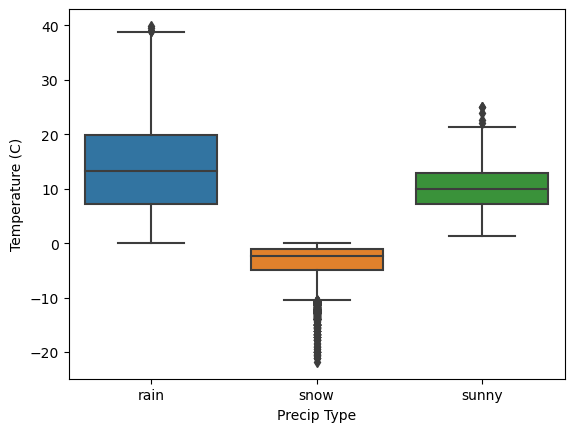

In [6]:
sns.boxplot(data=dados,y='Temperature (C)',x='Precip Type')

### Para os casos em que o tipo de precipitação são nulos, temos um dia sem chuva. Desta forma iremos fazer uma análise para cada um dos três casos (Sol, Chuva e Neve).

In [7]:
dias_sol = dados[(dados['Precip Type'] == 'sunny')]
dias_chuva = dados[(dados['Precip Type'] == 'rain')]
dias_neve = dados[(dados['Precip Type'] == 'snow')]

# Colocando em Gráficos a Umidade em Funções das Temperaturas

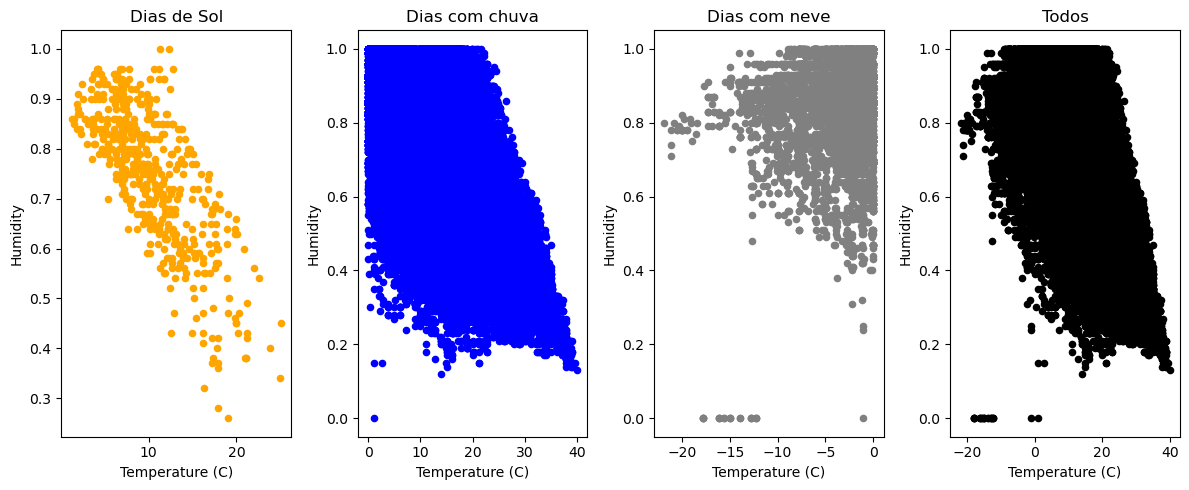

In [8]:
fig, ax = plt.subplots(1,4,figsize=(12,5))
dias_sol.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[0],title='Dias de Sol', color='orange');
dias_chuva.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[1],title='Dias com chuva', color='blue');
dias_neve.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[2],title='Dias com neve', color='grey');
dados.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[3],title='Todos', color='black');
plt.tight_layout();

### Através dos gráficos observamos que os dias com sol apresentam uma relação mais próxima da linear.
### Nos dias com chuva podemos observar uma possível relação linear porém com uma dispersão muito maior.
### Já os dias com neve não é clara uma relação linear.

# Observando cada Temperatura e Fazendo um Estudo sobre ela para Criação do Modelo ML.

# DIAS DE SOL

In [9]:
dias_sol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 52672 to 95588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               517 non-null    object 
 1   Temperature (C)           517 non-null    float64
 2   Apparent Temperature (C)  517 non-null    float64
 3   Humidity                  517 non-null    float64
 4   Wind Speed (km/h)         517 non-null    float64
 5   Wind Bearing (degrees)    517 non-null    float64
 6   Visibility (km)           517 non-null    float64
 7   Loud Cover                517 non-null    float64
 8   Pressure (millibars)      517 non-null    float64
dtypes: float64(8), object(1)
memory usage: 40.4+ KB


In [10]:
dias_sol.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

# Armazenando temperatura e umidade nas variáveis X e Y

In [11]:
X = dias_sol['Temperature (C)'].values.reshape(-1, 1)
Y = dias_sol['Humidity'].values.reshape(-1, 1)

# Separando valores em amostras de treino e teste com o SkLearn. 

In [12]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.30, shuffle=True, random_state=0)

In [13]:
X_treino.size

361

In [14]:
X_teste.size

156

# Criando modelo de Regressão Linear com SkLearn Regression

In [15]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

In [16]:
modelo.fit(X_treino,Y_treino)

LinearRegression()

In [17]:
Y_previsto = modelo.predict(X_teste)

# Criando Gráfico com Valores Reais e Previstos

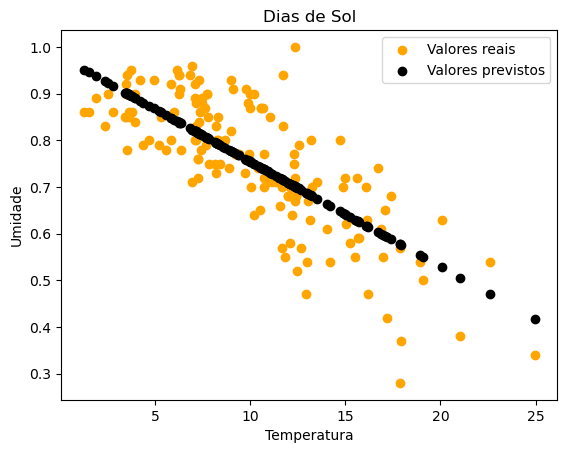

In [18]:
plt.scatter(X_teste,Y_teste,color='orange',label='Valores reais')
plt.scatter(X_teste,Y_previsto,color='black',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.title('Dias de Sol')
plt.legend(loc='best')

# Analisando erros da previsão. 

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE_sol = mean_absolute_error(Y_teste,Y_previsto)
RMSE_sol = np.sqrt(mean_squared_error(Y_teste,Y_previsto))

print('MAE = {:0.4f}'.format(MAE_sol))
print('RMSE = {:0.4f}'.format(RMSE_sol))

MAE = 0.0698
RMSE = 0.0891


# DIAS DE CHUVA

In [21]:
dias_chuva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85224 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               85224 non-null  object 
 1   Temperature (C)           85224 non-null  float64
 2   Apparent Temperature (C)  85224 non-null  float64
 3   Humidity                  85224 non-null  float64
 4   Wind Speed (km/h)         85224 non-null  float64
 5   Wind Bearing (degrees)    85224 non-null  float64
 6   Visibility (km)           85224 non-null  float64
 7   Loud Cover                85224 non-null  float64
 8   Pressure (millibars)      85224 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.5+ MB


In [22]:
dias_chuva.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

# Armazenando temperatura e umidade nas variáveis X e Y

In [23]:
X_chuva = dias_chuva['Temperature (C)'].values.reshape(-1, 1)
Y_chuva = dias_chuva['Humidity'].values.reshape(-1, 1)

# Separando valores em amostras de treino e teste com o SkLearn

In [24]:
X_treino_chuva, X_teste_chuva, Y_treino_chuva, Y_teste_chuva = train_test_split(X_chuva, Y_chuva, test_size=0.30, shuffle=True, random_state=0)

In [25]:
X_treino_chuva.size

59656

In [26]:
X_teste_chuva.size

25568

# Criando modelo de Regressão Linear com SkLearn Regression

In [27]:
modelo2 = LinearRegression()

In [28]:
modelo2.fit(X_treino_chuva,Y_treino_chuva)

LinearRegression()

In [29]:
Y_previsto_chuva = modelo2.predict(X_teste_chuva)

# Criando Gráfico com Valores Reais e Previstos

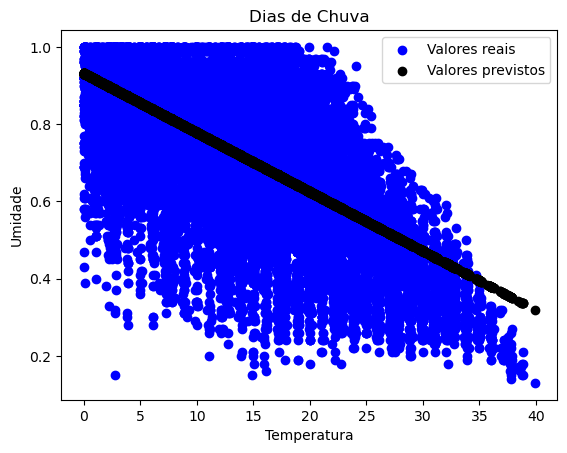

In [30]:
plt.scatter(X_teste_chuva,Y_teste_chuva,color='blue',label='Valores reais')
plt.scatter(X_teste_chuva,Y_previsto_chuva,color='black',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.title('Dias de Chuva')
plt.legend(loc='best')

# Analisando erros da previsão

In [31]:
MAE_chuva = mean_absolute_error(Y_teste_chuva,Y_previsto_chuva)
RMSE_chuva = np.sqrt(mean_squared_error(Y_teste_chuva,Y_previsto_chuva))

print('MAE = {:0.4f}'.format(MAE_chuva))
print('RMSE = {:0.4f}'.format(RMSE_chuva))

MAE = 0.1211
RMSE = 0.1506


# DIAS COM NEVE

In [32]:
dias_neve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10712 entries, 1562 to 93506
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               10712 non-null  object 
 1   Temperature (C)           10712 non-null  float64
 2   Apparent Temperature (C)  10712 non-null  float64
 3   Humidity                  10712 non-null  float64
 4   Wind Speed (km/h)         10712 non-null  float64
 5   Wind Bearing (degrees)    10712 non-null  float64
 6   Visibility (km)           10712 non-null  float64
 7   Loud Cover                10712 non-null  float64
 8   Pressure (millibars)      10712 non-null  float64
dtypes: float64(8), object(1)
memory usage: 836.9+ KB


In [33]:
dias_neve.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

# Armazenando temperatura e umidade nas variáveis X e Y

In [34]:
X_neve = dias_neve['Temperature (C)'].values.reshape(-1, 1)
Y_neve = dias_neve['Humidity'].values.reshape(-1, 1)

# Separando valores em amostras de treino e teste com o SkLearn

In [35]:
X_treino_neve, X_teste_neve, Y_treino_neve, Y_teste_neve = train_test_split(X_neve, Y_neve, test_size=0.30, shuffle=True, random_state=0)

In [36]:
X_treino_neve.size

7498

In [37]:
X_teste_neve.size

3214

# Criando modelo de Regressão Linear com SkLearn Regression

In [38]:
modelo3 = LinearRegression()

In [39]:
modelo3.fit(X_treino_neve,Y_treino_neve)

LinearRegression()

In [40]:
Y_previsto_neve = modelo3.predict(X_teste_neve)

# Criando Gráfico com Valores Reais e Previstos

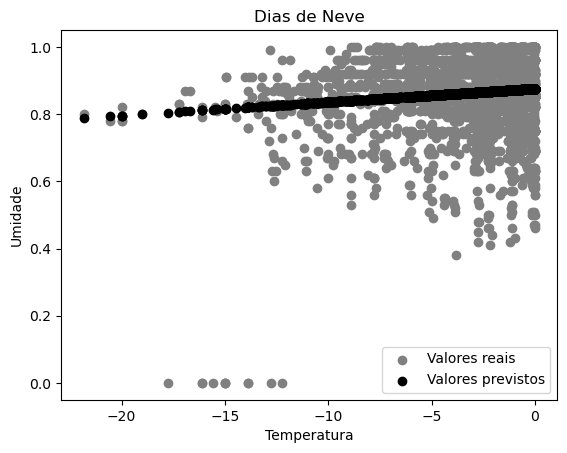

In [41]:
plt.scatter(X_teste_neve,Y_teste_neve,color='grey',label='Valores reais')
plt.scatter(X_teste_neve,Y_previsto_neve,color='black',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.title('Dias de Neve')
plt.legend(loc='best')

# Analisando erros da previsão

In [42]:
MAE_neve = mean_absolute_error(Y_teste_neve,Y_previsto_neve)
RMSE_neve = np.sqrt(mean_squared_error(Y_teste_neve,Y_previsto_neve))

print('MAE = {:0.4f}'.format(MAE_neve))
print('RMSE = {:0.4f}'.format(RMSE_neve))

MAE = 0.0824
RMSE = 0.1130
